# Machine Learning in Python
#### by: Chenshu Liu
Reference link: https://youtu.be/rLOyrWV8gmA?list=PLGenESRtZKmFRJ7ZLXbhQRygnRwQOolXi

## Table of Contents
1. [KNN](#KNN)
2. [Linear Regression](#Linear-Regression)
3. [Logistic Regression](#Logistic-Regression)
4. [Regression Refactoring](#Regression-Refactoring)
5. [Naive Bayes](#Naive-Bayes)
6. [Perceptron](#Perceptron)
7. [SVM](#SVM)
8. [Decision Tree](#Decision-Tree)
9. [Random Forest](#Random-Forest)
10. [PCA](#PCA)
11. [K-Means](#K\-Means)
12. [AdaBoost](#AdaBoost)
13. [LDA](#LDA)

## Libraries

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## KNN
> KNN is the abreviation of K Nearest Neighbors. 

The process of determining the classification of the sample is find `k` (_defined by user_) nearest neighbors of the sample point (**e.g. the green point**) and calculate the euclidean distance of the neighbor points (**the blue and orange points**) from the sample points. 

Since we already know the categories that the neighbor points belong to, we can use the majority of the neighbor category as the classification for the sample point (_e.g. in the case of the image shown below, since two of the three points are blue, the sample point, i.e. the green point, is classified as blue_).

![K-Nearest Neighbor](Images/KNN.jpeg)

In [17]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1234)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(x1 - x2)**2)

class KNN:
    def __init__(self, k = 3):
        assert (k >= 1) & (type(k) == int), f"k value {k} is invalid"
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    # to predict sample cases
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
        
    def _predict(self, x):
        # compute the distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # get k nearest samples and labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # majority vote --> most common class label
        # the Counter function returns a tuple(value, # of occurrence)
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
clf = KNN(k = 3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"The prediction accuracy is {accuracy}.")

The prediction accuracy is 0.9333333333333333.


## Linear Regression

>Linear regression is used to predict continuous values using the approximation formula $\hat{y} = wx + b$<br>

To find the optimal values of the weight w and intercept b, we introduce MSE to evaluate the error of prediction for some w and b. MSE is calculated as follows:
$$MSE = J(w, b) = \frac{1}{N}\Sigma_{i=1}^n(y_i - (wx_i + b))^2$$
Then, we use **gradient descent** to find the optimal set of $(w, b)$ that minimizes the partial derivates of MSE:
$$J'(w, b) = \begin{bmatrix} \frac{\partial f}{\partial w} \\ \frac{\partial f}{\partial b} \end{bmatrix} = \begin{bmatrix} \frac{1}{N}\Sigma -2x_i(y_i - (wx_i + b))\\ \frac{1}{N}\Sigma -2(y_i - (wx_i + b))\end{bmatrix}
$$
Gradient descent is an iterative process that iterates the calculation until the local minimum is reached. In this case, since we have two parameters $(w, b)$, we are conducting gradient descent in a two-dimensional space.<br>
After every iteration, we will update the parameters in the following way:
$$w = w - \alpha \cdot dw$$
$$b = b - \alpha \cdot db$$

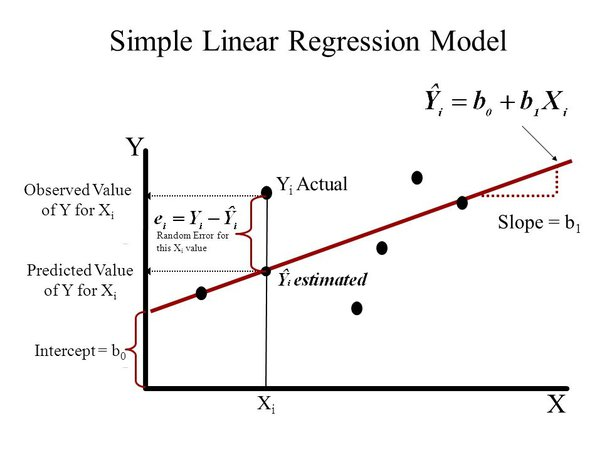

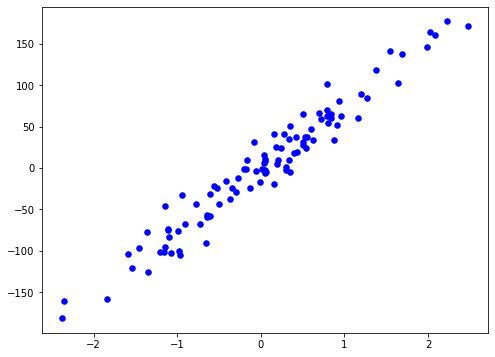

The prediction accuracy, according to MSE, is 305.7719958301902


In [11]:
# data generation
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

fig = plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], y, color = 'b', marker = 'o', s = 30)
plt.show()

class LinearRegression:
    # lr stands for learning rate
    # n_iters stands for number of iterations
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # initialization of parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted
    
regressor = LinearRegression(lr = 0.01)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)
print(f"The prediction accuracy, according to MSE, is {MSE(y_test, predicted)}")

## Logistic Regression

> Logistic regression is a binary classification algorithm

In linear regression, we model the behavior of the data using linear function to predict continuous values. In logistic regression, we want to predict binary outcomes, thus we will use a sigmoid function $s(x) = \frac{1}{1 + e^{-x}}$. And, for the prediction, we have $\hat{y} = h_{\theta}(x) = \frac{1}{1 + e^{-wx+b}}$. Similar to the process of finding optimal parameters for linear regression function, we also use gradient descent to find the best set of values for $(w, b)$ that provides the best prediction performance. The cost function (cross entropy) is:
$$J(w, b) = J(\theta) = \frac{1}{N}\Sigma_{i=1}^n[y^ilog(h_{\theta}(x^i) + (1-y^i)log(1 - h_{\theta}(x^i))]$$

**The gradient descent procedure is the same as those from the linear regression section.**

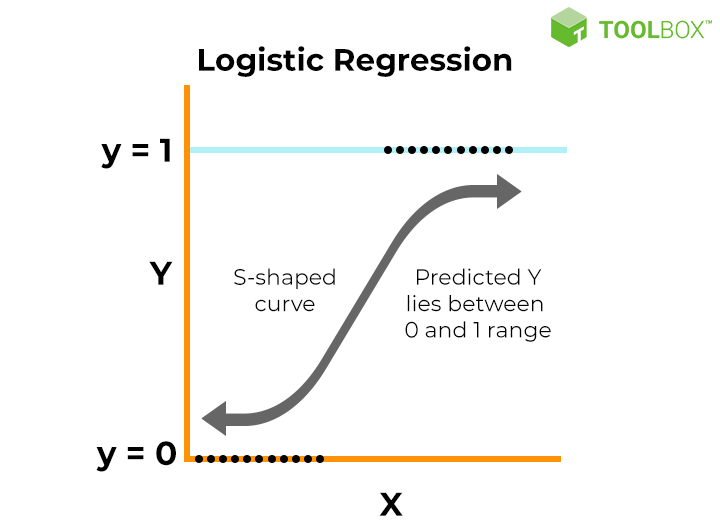

In [13]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

class LogisticRegression:
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            dw = 1/n_samples * np.dot(X.T, (y_predicted - y))
            db = 1/n_samples * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
        
    # helper method for finding sigmoid prediction
    def _sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

regressor = LogisticRegression(lr = 0.0001, n_iters = 1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print(f"The prediction accuracy is {accuracy(y_test, predictions)}")

The prediction accuracy is 0.9298245614035088


## Regression Refactoring

The goal of this regression refactoring is to combine the algorithms from the last two sections. Because we can see that the algorithm for linear regression and logistic regression shares the same logic (_i.e. gradient descent_) we can unify the code to a **BaseRegression** class to handle botb linear regression and logistic regression.

In [16]:
class BaseRegression:
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # initialize the parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        # gradient descent
        dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1/n_samples) * np.sum(y_predicted - y)
        self.weights -= self.lr * dw
        self.bias -= self.lr * db
        
    def predict(self, X):
        return self._predict(X, self.weights, self.bias)
        
    def _predict(self, X, w, b):
        # force to call the inherited class
        raise NotImplementedError()

# subclass #1: linear regression   
class LinearRegression(BaseRegression):
    def _predict(self, X, w, b):
        return np.dot(X, w) + b
    
# subclass #2: logistic regression
class LogisticRegression(BaseRegression):
    def _predict(self, X, w, b):
        linear_model = np.dot(X, w) + b
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
        
    def _sigmoid(self, x):
        return 1/(1 + np.exp(-x))

## Naive Bayes

> Naive Bayes is a classification algorithm that is achieved through the Bayes Theorem

Bayes Theorem:
$$P(A|B) = \frac{P(B|A)\cdot P(A)}{P(B)}$$
In our case, using X to predict for y:
$$P(y|X) = \frac{P(X|y)P(y)}{P(X)}$$
Though in real life cases, all features are rarely independent, but the assumption of all features being mutually independent still proves to be effective:
$$P(y|X) = \frac{P(x_1|y)\cdot P(x_2|y)\cdot \dots \cdot P(x_n|y)\cdot P(y)}{P(X)}$$
Where:
* Prior probability $P(y)$ is just the frequency
* Class conditional probability follows the gausian distribution: $P(x_i|y) = \frac{1}{\sqrt{2\pi \sigma_y^2}}\cdot
exp(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2})$

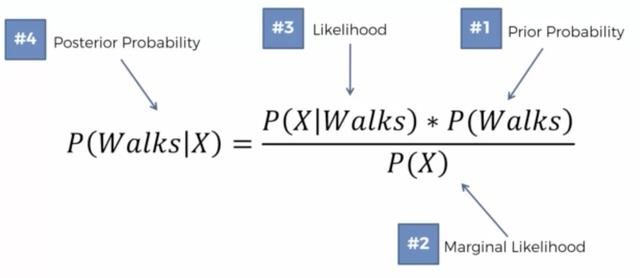

Then, the classification is performed by selecting the class with the highest probability:
$$y = argmax_yP(y|X) = argmax_y\frac{P(x_1|y)\cdot P(x_2|y)\cdot \dots \cdot P(x_n|y)\cdot P(y)}{P(X)}$$
$$y = argmax_yP(x_1|y)\cdot P(x_2|y)\cdot \dots \cdot P(x_n|y)\cdot P(y)$$
Because all the probabilities are values between 0 and 1, and multiplying them may lead to the product being a very small number. Thus, in order to prevent **overflow**, we can apply logarithm to the product:
$$y = argmax_ylog(P(x_1|y)) + log(P(x_2|y)) + \dots + log(P(x_n|y)) + log(P(y))$$

In [19]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # find unique classes of y
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        # initialize mean, variance, and prior prob
        self._mean = np.zeros((n_classes, n_features), dtype = np.float64)
        self._var = np.zeros((n_classes, n_features), dtype = np.float64)
        self._prior = np.zeros(n_classes, dtype = np.float64)
        
        for c in self._classes:
            X_c = X[c == y]
            self._mean[c, :] = X_c.mean(axis = 0)
            self._var[c, :] = X_c.var(axis = 0)
            self._prior[c] = X_c.shape[0] / float(n_samples) 
    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return y_pred
        
    def _predict(self, x):
        posteriors = []
        for idx, c in enumerate(self._classes):
            prior = np.log(self._prior[idx])
            class_conditional = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)]
            
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-(x - mean)**2/(2*var))
        denominator = np.sqrt(2*np.pi*var)
        return numerator / denominator
    
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_classification(n_samples = 1000, n_features = 10, n_classes = 2, random_state = 123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f"The prediction accuracy using Naive Bayes is {accuracy(y_pred, y_test)}")

The prediction accuracy using Naive Bayes is 0.965


## Perceptron

> Perceptron is a simplified version of a biological neuron

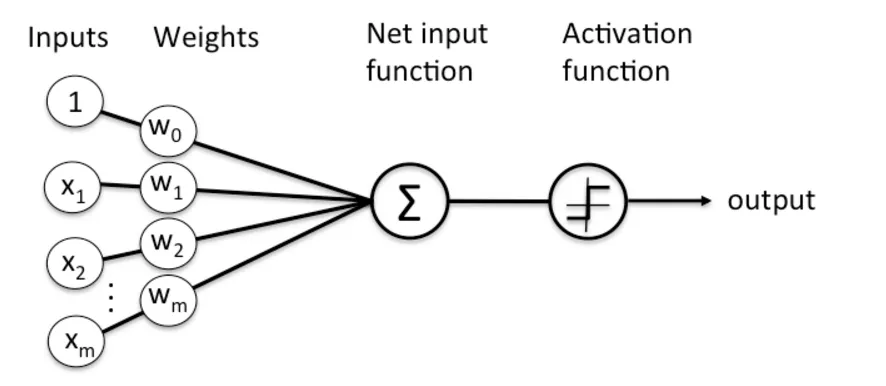

The neuron in the biological system receives inputs through dendrites and generates one response (_i.e. output_) through the axon. In the perceptron model, we can express the pipeline of information processing using a linear function $y = w^Tx + b$ where $w$ is the weight assigned to each input node and $b$ is the bias. In the image above, we can see that after the input and weights are manipulated, an activation function is called. In the case of perceptron, it is simple the **unit step function** that becomes significant only when the value reaches certain threshold.

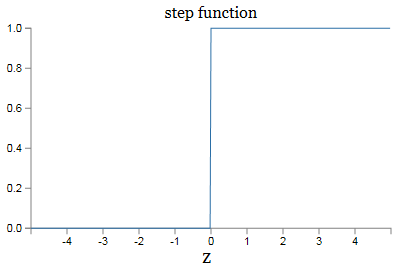

Thus, we can summarize the pipeline as $$\hat{y} = g(f(w, b)) = g(w^Tx + b)$$ and through the training process, we can update the parameters using the perceptron update rule, such that for each training sample $x_i$:
* $w := w + \Delta w$
* $\Delta w := \alpha \cdot (y_i - \hat{y_i})\cdot x_i$
* learning rate $\alpha$ is between [0, 1]

During the dynamic update of the weights, the weights are adjusted to better match the prediction with the actual value. So, the reason why there is a $(y_i - \hat{y_i})$ term is that:
* When the predicted $\hat{y_i}$ is greater than the actual $y_i$, the weight update $\Delta w$ has a negative value, reducing the weight in the new iteration
* When the predicted $\hat{y_i}$ is less than the actual $y_i$, the weight update $\Delta w$ has a positive value, increasing the weight in the new iteration
* In sum, **the weights are pushed towards positive or negative target class in cases of misclassification**

**NOTE:** perceptron **only works for linearly separable classes** (_i.e. classes that can be separated using a linear function_). For further improvements, the activation function can be changed accordingly (_i.e. instead of using the unit step function, we can use functions like the sigmoid function_)

In [25]:
class Perceptron:
    def __init__(self, learning_rate = 0.01, n_iters = 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # need to make sure the target consists only 0 and 1
        y_ = np.array([1 if i > 0 else 0 for i in y])
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_func(linear_output)
                update = self.lr * (y_[idx] - y_pred)
                self.weights += update*x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.activation_func(linear_output)
        return y_pred
        
    def _unit_step_func(self, x):
        # only works for single input
        # return 1 if x >=0 else 0
        # works for array
        return np.where(x >= 0, 1, 0)  
    
def accuracy(y_actual, y_pred):
    accuracy = np.sum(y_actual == y_pred) / len(y_actual)
    return accuracy

X, y = datasets.make_blobs(n_samples = 150, n_features = 2, centers = 2, cluster_std = 1.05, random_state = 123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

p = Perceptron(learning_rate  = 0.01, n_iters = 1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)
print(f"The prediction accuracy of the perceptron is {accuracy(y_test, predictions)}")

The prediction accuracy of the perceptron is 1.0


## SVM

> SVM is the abbreviation for support vector machine



## Decision Tree

## Random Forest

## PCA

## K-Means

## AdaBoost

## LDA